___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [118]:
df = pd.read_csv("final_scout_not_get_dummy.csv")

In [119]:
df.head()

make_model        km  Type     Fuel  Gears  \
0    Audi A1 56013.000  Used   Diesel  7.000   
1    Audi A1 80000.000  Used  Benzine  7.000   
2    Audi A1 83450.000  Used   Diesel  7.000   
3    Audi A1 73000.000  Used   Diesel  6.000   
4    Audi A1 16200.000  Used   Diesel  7.000   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                Entertaintment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security Body_Type  Price  \
0  ABS,Central door lock,Daytime running lights,D...    Sedans  15770   
1  ABS,Central door lock,Central door lock with r...    Sedans  14500   
2  ABS,Central door lock,Daytime running lights,D...    Sedans  14640   
3  ABS,Alarm system,Central door lock with remote...    Sedans  14500   
4  ABS,Central door lock,Driver-side airbag,Elect...    Sedans  16790   

                Vat   Age  Previous_Owners   hp_kW  Inspection_new Paint_Type  \
0    VAT deductible 3.000            2.000  66.000               1   Metallic   
1  Price negotiable 2.000            1.000 141.000               0   Metallic   
2    VAT deductible 3.000            1.000  85.000               0   Metallic   
3    VAT deductible 3.000            1.000  66.000               0   Metallic   
4    VAT deductible 3.000            1.000  66.000               1   Metallic   

  Upholstery_Type Gearing_Type  Displacement_cc  Weight_kg Drive_Chain  \
0           Cloth    Automatic         1422.000   1220.000       front   
1           Cloth    Automatic         1798.000   1255.000       front   
2           Cloth    Automatic         1598.000   1135.000       front   
3           Cloth    Automatic         1422.000   1195.000       front   
4           Cloth    Automatic         1422.000   1135.000       front   

   Cons_Comb  CO2_Emission  
0      3.000        99.000  
1      5.000       129.000  
2      3.000        99.000  
3      3.000        99.000  
4      4.000       109.000

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            15914 non-null  object 
 1   km                    15914 non-null  float64
 2   Type                  15914 non-null  object 
 3   Fuel                  15914 non-null  object 
 4   Gears                 15914 non-null  float64
 5   Comfort_Convenience   15914 non-null  object 
 6   Entertaintment_Media  15914 non-null  object 
 7   Extras                15914 non-null  object 
 8   Safety_Security       15914 non-null  object 
 9   Body_Type             15914 non-null  object 
 10  Price                 15914 non-null  int64  
 11  Vat                   15914 non-null  object 
 12  Age                   15914 non-null  float64
 13  Previous_Owners       15914 non-null  float64
 14  hp_kW                 15914 non-null  float64
 15  Inspection_new     

In [121]:
df.describe()

km     Gears     Price       Age  Previous_Owners     hp_kW  \
count  15914.000 15914.000 15914.000 15914.000        15914.000 15914.000   
mean   32090.368     5.937 18023.741     1.390            1.043    88.500   
std    36978.347     0.705  7381.470     1.121            0.338    26.675   
min        0.000     5.000  4950.000     0.000            0.000    40.000   
25%     1919.250     5.000 12850.000     0.000            1.000    66.000   
50%    20411.500     6.000 16900.000     1.000            1.000    85.000   
75%    46900.000     6.000 21900.000     2.000            1.000   103.000   
max   317000.000     8.000 74600.000     3.000            4.000   294.000   

       Inspection_new  Displacement_cc  Weight_kg  Cons_Comb  CO2_Emission  
count       15914.000        15914.000  15914.000  15914.000     15914.000  
mean            0.247         1428.651   1337.713      4.331       118.326  
std             0.431          275.810    199.682      0.881        17.154  
min             0.000          890.000    840.000      3.000        80.000  
25%             0.000         1229.000   1165.000      4.000       105.000  
50%             0.000         1461.000   1296.500      4.000       117.000  
75%             0.000         1598.000   1472.000      5.000       129.000  
max             1.000         2967.000   2471.000      9.000       253.000

In [122]:
df.columns

Index(['make_model', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain', 'Cons_Comb', 'CO2_Emission'],
      dtype='object')

In [123]:
df2 = df.copy()      # Feature engineeringden once bir copy almak onemli. Ilerde ihtiyacimiz olabilir.

## Feature Engineering

In [124]:
df.select_dtypes(include ="object").head()

make_model  Type     Fuel  \
0    Audi A1  Used   Diesel   
1    Audi A1  Used  Benzine   
2    Audi A1  Used   Diesel   
3    Audi A1  Used   Diesel   
4    Audi A1  Used   Diesel   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                Entertaintment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security Body_Type  \
0  ABS,Central door lock,Daytime running lights,D...    Sedans   
1  ABS,Central door lock,Central door lock with r...    Sedans   
2  ABS,Central door lock,Daytime running lights,D...    Sedans   
3  ABS,Alarm system,Central door lock with remote...    Sedans   
4  ABS,Central door lock,Driver-side airbag,Elect...    Sedans   

                Vat Paint_Type Upholstery_Type Gearing_Type Drive_Chain  
0    VAT deductible   Metallic           Cloth    Automatic       front  
1  Price negotiable   Metallic           Cloth    Automatic       front  
2    VAT deductible   Metallic           Cloth    Automatic       front  
3    VAT deductible   Metallic           Cloth    Automatic       front  
4    VAT deductible   Metallic           Cloth    Automatic       front

In [125]:
for col in df.select_dtypes('object'):         # Object columnlarda unique degerler.
    print(f"{col:<20}:", df[col].nunique())    # Comfort_Convenience gibi .ok sutunlu columnlar get dummies icin secilmemeli cunku cok fazla unique var.

make_model          : 8
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertaintment_Media: 346
Extras              : 659
Safety_Security     : 4442
Body_Type           : 8
Vat                 : 2
Paint_Type          : 3
Upholstery_Type     : 2
Gearing_Type        : 3
Drive_Chain         : 3


In [126]:
df.make_model.value_counts()      # Egitim icin elimde yeterli veri var mi? Audi A2 yetersiz, 1 veri var.

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

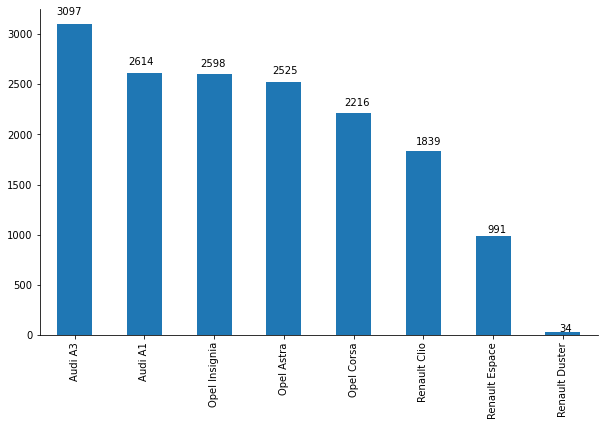

In [127]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [128]:
df[df.make_model=="Audi A2"]

Empty DataFrame
Columns: [make_model, km, Type, Fuel, Gears, Comfort_Convenience, Entertaintment_Media, Extras, Safety_Security, Body_Type, Price, Vat, Age, Previous_Owners, hp_kW, Inspection_new, Paint_Type, Upholstery_Type, Gearing_Type, Displacement_cc, Weight_kg, Drive_Chain, Cons_Comb, CO2_Emission]
Index: []

In [129]:
df.drop(index=[2614], inplace =True)

In [130]:
df.shape

(15913, 24)

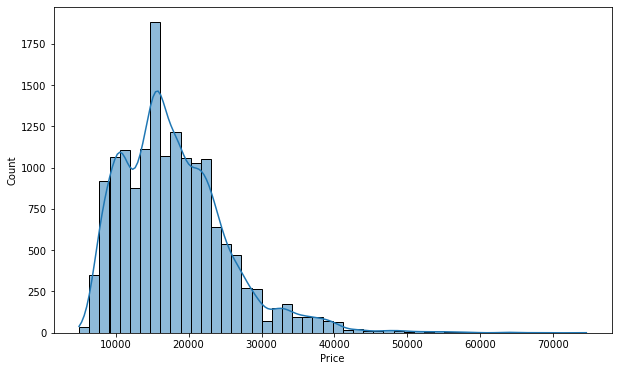

In [131]:
sns.histplot(df.Price, bins=50, kde=True);      # 40.000 Tl'den sonraki araba sayisi cok az. Muhtemelen model bunlari iyi ogrenemeyeck.

In [132]:
skew(df.Price)     # Right skew bir dagilim var.

1.236275200571232

In [133]:
df_numeric = df.select_dtypes(include ="number")     # Numeric datalara bakiyoruz.
df_numeric

km  Gears  Price   Age  Previous_Owners   hp_kW  Inspection_new  \
0     56013.000  7.000  15770 3.000            2.000  66.000               1   
1     80000.000  7.000  14500 2.000            1.000 141.000               0   
2     83450.000  7.000  14640 3.000            1.000  85.000               0   
3     73000.000  6.000  14500 3.000            1.000  66.000               0   
4     16200.000  7.000  16790 3.000            1.000  66.000               1   
...         ...    ...    ...   ...              ...     ...             ...   
15909  1647.363  6.000  39950 0.000            1.000 147.000               0   
15910  9900.000  7.000  39885 0.000            1.000 165.000               0   
15911    15.000  6.000  39875 0.000            1.000 146.000               1   
15912    10.000  6.000  39700 0.000            1.000 147.000               0   
15913  1647.363  6.000  40999 0.000            1.000 165.000               1   

       Displacement_cc  Weight_kg  Cons_Comb  CO2_Emission  
0             1422.000   1220.000      3.000        99.000  
1             1798.000   1255.000      5.000       129.000  
2             1598.000   1135.000      3.000        99.000  
3             1422.000   1195.000      3.000        99.000  
4             1422.000   1135.000      4.000       109.000  
...                ...        ...        ...           ...  
15909         1997.000   1758.000      5.000       139.000  
15910         1798.000   1708.000      7.000       168.000  
15911         1997.000   1734.000      5.000       139.000  
15912         1997.000   1758.000      5.000       139.000  
15913         1798.000   1685.000      6.000       153.000  

[15913 rows x 11 columns]

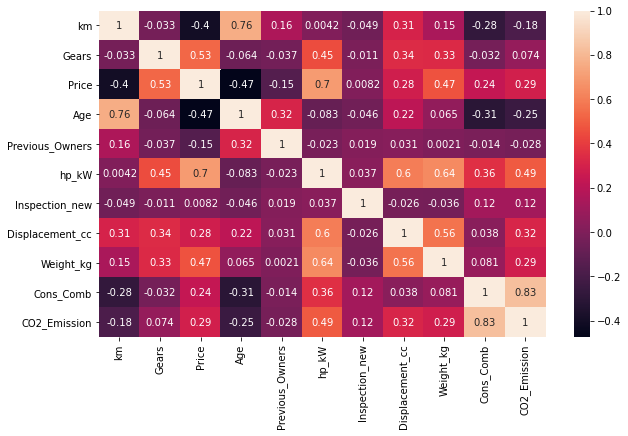

In [134]:
sns.heatmap(df_numeric.corr(), annot =True);

## multicollinearity control

In [135]:
df_numeric.corr()

km  Gears  Price    Age  Previous_Owners  hp_kW  \
km               1.000 -0.033 -0.399  0.758            0.156  0.004   
Gears           -0.033  1.000  0.530 -0.064           -0.037  0.450   
Price           -0.399  0.530  1.000 -0.474           -0.146  0.697   
Age              0.758 -0.064 -0.474  1.000            0.315 -0.083   
Previous_Owners  0.156 -0.037 -0.146  0.315            1.000 -0.023   
hp_kW            0.004  0.450  0.697 -0.083           -0.023  1.000   
Inspection_new  -0.049 -0.011  0.008 -0.046            0.019  0.037   
Displacement_cc  0.307  0.340  0.282  0.215            0.031  0.597   
Weight_kg        0.147  0.334  0.469  0.065            0.002  0.638   
Cons_Comb       -0.275 -0.032  0.239 -0.310           -0.014  0.357   
CO2_Emission    -0.176  0.074  0.288 -0.246           -0.028  0.491   

                 Inspection_new  Displacement_cc  Weight_kg  Cons_Comb  \
km                       -0.049            0.307      0.147     -0.275   
Gears                    -0.011            0.340      0.334     -0.032   
Price                     0.008            0.282      0.469      0.239   
Age                      -0.046            0.215      0.065     -0.310   
Previous_Owners           0.019            0.031      0.002     -0.014   
hp_kW                     0.037            0.597      0.638      0.357   
Inspection_new            1.000           -0.026     -0.036      0.121   
Displacement_cc          -0.026            1.000      0.563      0.038   
Weight_kg                -0.036            0.563      1.000      0.081   
Cons_Comb                 0.121            0.038      0.081      1.000   
CO2_Emission              0.123            0.318      0.286      0.831   

                 CO2_Emission  
km                     -0.176  
Gears                   0.074  
Price                   0.288  
Age                    -0.246  
Previous_Owners        -0.028  
hp_kW                   0.491  
Inspection_new          0.123  
Displacement_cc         0.318  
Weight_kg               0.286  
Cons_Comb               0.831  
CO2_Emission            1.000

In [136]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any()    # 0.1'den kucuk ve 0.9'dan buyuk corr degeri var mi?

km                 False
Gears              False
Price              False
Age                False
Previous_Owners    False
hp_kW              False
Inspection_new     False
Displacement_cc    False
Weight_kg          False
Cons_Comb          False
CO2_Emission       False
dtype: bool

In [137]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [138]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

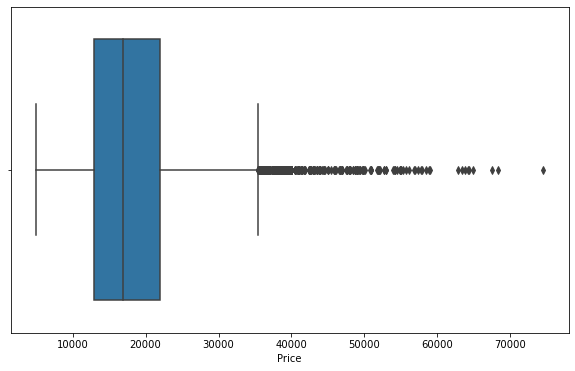

In [139]:
sns.boxplot(df.Price);     # ML' de outlier veriler icin bakmamiz gerekenler : 1- Gercek dunya verisi mi?
                           #                                                   2- Elimdeki outlier veriler egitim icin yeterli mi?

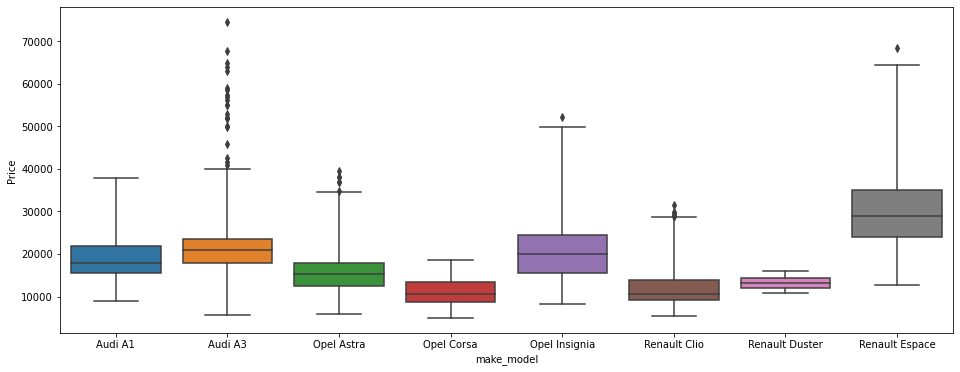

In [140]:
plt.figure(figsize=(16,6))                                  # Outlier'lara marka-modellere gore bakiyoruz.
sns.boxplot(x="make_model", y="Price", data=df, whis=3)     # Modelin outlier' lari kotu tahmin etme ihtimali var ama yine de once modele sokup bakacagiz.
plt.show()                                                  # Modeldeki performansa gore durum degerlendirmesi yapacagiz.

In [141]:
df.columns

Index(['make_model', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience',
       'Entertaintment_Media', 'Extras', 'Safety_Security', 'Body_Type',
       'Price', 'Vat', 'Age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_Chain', 'Cons_Comb', 'CO2_Emission'],
      dtype='object')

## Get dummies 

In [142]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertaintment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [143]:
df.drop(["Comfort_Convenience","Entertaintment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [144]:
df = pd.get_dummies(df, drop_first =True)

In [145]:
df.head()

km  Gears  Price   Age  Previous_Owners   hp_kW  Inspection_new  \
0 56013.000  7.000  15770 3.000            2.000  66.000               1   
1 80000.000  7.000  14500 2.000            1.000 141.000               0   
2 83450.000  7.000  14640 3.000            1.000  85.000               0   
3 73000.000  6.000  14500 3.000            1.000  66.000               0   
4 16200.000  7.000  16790 3.000            1.000  66.000               1   

   Displacement_cc  Weight_kg  Cons_Comb  CO2_Emission  cc_Air conditioning  \
0         1422.000   1220.000      3.000        99.000                    1   
1         1798.000   1255.000      5.000       129.000                    1   
2         1598.000   1135.000      3.000        99.000                    1   
3         1422.000   1195.000      3.000        99.000                    0   
4         1422.000   1135.000      4.000       109.000                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                  

In [146]:
df.shape    # get_dummies isleminden sonra sutun sayisi cok fazla artti, complexity artti. Asagida bunlarla mucadele edecegiz.

(15913, 134)

In [147]:
df.isnull().any().any()

False

In [148]:
corr_by_price = df.corr()["Price"].sort_values()[:-1]    # Butun feature'larin target label ile olan corr iliskisi.
corr_by_price

Age                                        -0.474
Gearing_Type_Manual                        -0.432
km                                         -0.399
make_model_Opel Corsa                      -0.379
Type_Used                                  -0.366
make_model_Renault Clio                    -0.298
Drive_Chain_front                          -0.156
Previous_Owners                            -0.146
make_model_Opel Astra                      -0.128
em_CD player                               -0.093
em_On-board computer                       -0.077
ss_Central door lock with remote control   -0.070
Paint_Type_Perl effect                     -0.059
ss_Fog lights                              -0.053
ss_Isofix                                  -0.046
Body_Type_Sedans                           -0.044
ss_Central door lock                       -0.043
ss_Power steering                          -0.041
ss_Head airbag                             -0.034
ss_ABS                                     -0.032


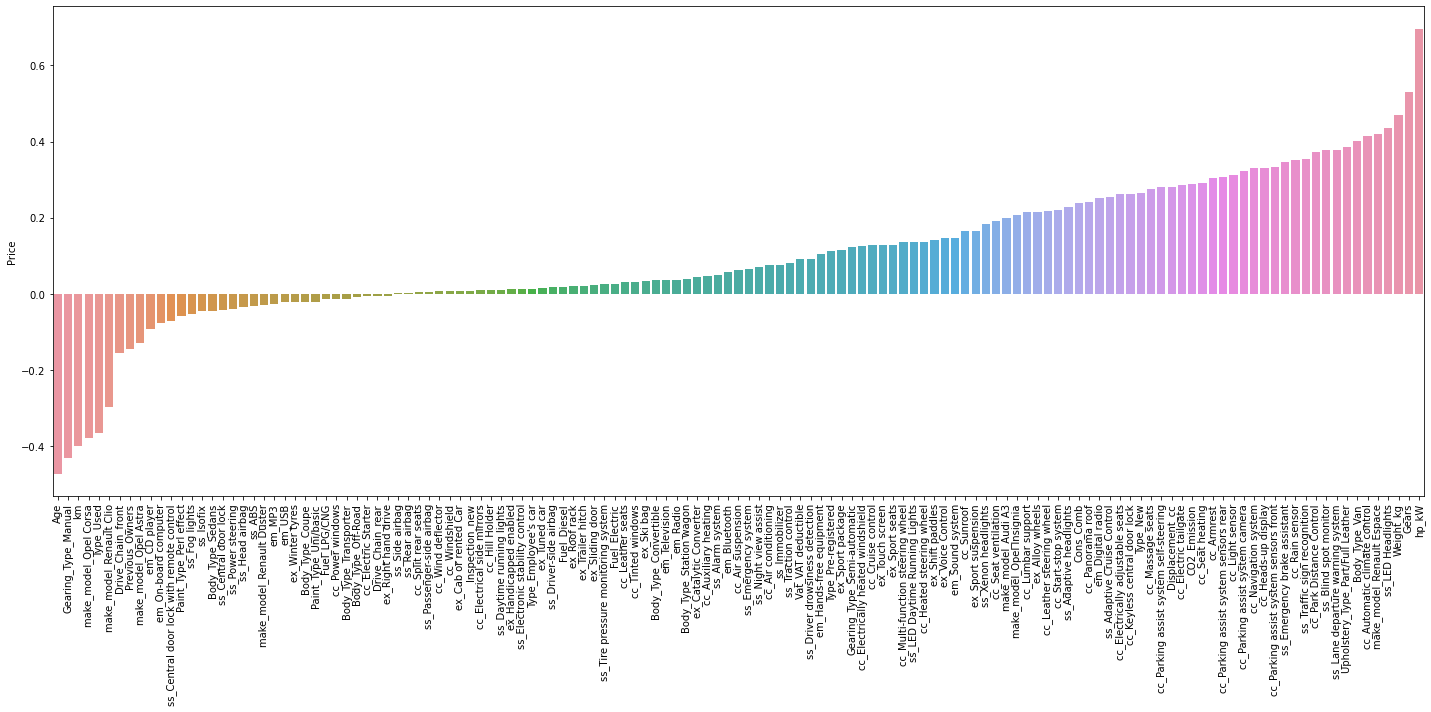

In [149]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();                      # hp' nin fiyata pozitif yonde, age' in ise negatif yonde guclu bir etkisi var.

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [150]:
df

km  Gears  Price   Age  Previous_Owners   hp_kW  Inspection_new  \
0     56013.000  7.000  15770 3.000            2.000  66.000               1   
1     80000.000  7.000  14500 2.000            1.000 141.000               0   
2     83450.000  7.000  14640 3.000            1.000  85.000               0   
3     73000.000  6.000  14500 3.000            1.000  66.000               0   
4     16200.000  7.000  16790 3.000            1.000  66.000               1   
...         ...    ...    ...   ...              ...     ...             ...   
15909  1647.363  6.000  39950 0.000            1.000 147.000               0   
15910  9900.000  7.000  39885 0.000            1.000 165.000               0   
15911    15.000  6.000  39875 0.000            1.000 146.000               1   
15912    10.000  6.000  39700 0.000            1.000 147.000               0   
15913  1647.363  6.000  40999 0.000            1.000 165.000               1   

       Displacement_cc  Weight_kg  Cons_Comb  CO2_Emission  \
0             1422.000   1220.000      3.000        99.000   
1             1798.000   1255.000      5.000       129.000   
2             1598.000   1135.000      3.000        99.000   
3             1422.000   1195.000      3.000        99.000   
4             1422.000   1135.000      4.000       109.000   
...                ...        ...        ...           ...   
15909         1997.000   1758.000      5.000       139.000   
15910         1798.000   1708.000      7.000       168.000   
15911         1997.000   1734.000      5.000       139.000   
15912         1997.000   1758.000      5.000       139.000   
15913         1798.000   1685.000      6.000       153.000   

       cc_Air conditioning  cc_Air suspension  cc_Armrest  \
0                        1                  0           1   
1                        1                  0           0   
2                        1                  0           0   
3                        0                  1           1   
4                        1                  0           1   
...                    ...                ...         ...   
15909                    1                  0           0   
15910                    1                  0           0   
15911                    1                  0           1   
15912                    1                  0           0   
15913                    1                  0           0   

       cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
0                                 1                     0                  1   
1                                 1                     0                  0   
2                                 0                     0                  1   
3                                 0                     1                  0   
4                                 1                     0                  0   
...                             ...                   ...                ...   
15909                             1                     0                  1   
15910                             1                     0                  1   
15911                             1                     0                  1   
15912                             1                     0                  1   
15913                             1                     0                  1   

       cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  \
0                        0                     0                           1   
1                        0                     0                           0   
2                        0                     0                           1   
3                        0                     0                           1   
4                        0                     0                           1   
...                    ...                   ...                         ...   
15909                    0                     0     

In [151]:
X= df.drop(columns="Price")
y= df.Price

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [153]:
X_train.shape

(12730, 133)

In [154]:
X_test.shape

(3183, 133)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [155]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)                      # predict asamasini her seferinde tekrar tekrar yazmamak icin genel bir fonk. tanimladik.
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [156]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [157]:
pd.options.display.float_format = '{:.3f}'.format     # mse degerleri buyuk ciktigi icin e' li degerler donduruyor ve okunmasi guc oluyor. 
                                                      # Bu kod ile virgulden sonra 3 hane getir dedik.

In [158]:
train_val(lm, X_train, y_train, X_test, y_test)    # Dogru tahmin yapabilmek icin gerekli olan verinin %89' una sahibiz.
                                                   # mae : Modelimiz yaklasik 1700 dolar yanlis tahmin yapiyor.
                                                   # rmse: Modelimiz yaklasik 2400 dolar yanlis tahmin yapiyor.
                                                   # mae ile rmse arasinda 700 dolar kadar fark var. Demek ki modelde cok kotu tahminler var.

train        test
R2         0.892       0.886
mae     1698.464    1730.643
mse  5934137.203 6061062.005
rmse    2436.008    2461.922

## Adjusted R2 Score

Feature sayisinda cok fazla bir artis oldugu zaman (ozellikle dummmies feature'lar icin),
satir-feature sayisi arasinda dengesizlik oldugu zaman skorlarimizda dusus olabilir. Bunu test etmek icin Adjusted R2 score' a bakiyoruz.
Eklenen her yeni feature, R2 score' da yalanci bir artisa sebep olabilir. Dataya 100 civari yeni sutun geldigi icin bu durumu kontrol ettik.

In [159]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [160]:
y_pred = lm.predict(X_test)

In [161]:
adj_r2(y_test, y_pred, df)    # Skor yukardaki ile birbirine yakin ciktigi icin bir problem olmadigina karar verdik.

0.8854560358531127

## Cross Validate

In [114]:
model = LinearRegression(normalize = True)                 
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [115]:
pd.DataFrame(scores)

fit_time  score_time                       test_r2  \
0     0.067       0.004                         0.897   
1     0.060       0.002 -612713336007999635849216.000   
2     0.046       0.002                         0.885   
3     0.043       0.002                         0.887   
4     0.042       0.002                         0.880   
5     0.045       0.002                         0.896   
6     0.051       0.002                         0.879   
7     0.039       0.002                         0.890   
8     0.055       0.002                         0.877   
9     0.038       0.002                         0.891   

   test_neg_mean_absolute_error           test_neg_mean_squared_error  \
0                     -1683.591                          -5395316.901   
1          -162083657108109.812 -33443125449949470146059661475840.000   
2                     -1717.061                          -5871107.521   
3                     -1673.096                          -6216060.712   
4                     -1766.782                          -7179811.721   
5                     -1695.959                          -5993797.360   
6                     -1771.403                          -6149640.066   
7                     -1758.634                          -6310929.962   
8                     -1764.395                          -6767676.281   
9                     -1668.663                          -5733491.513   

   test_neg_root_mean_squared_error  
0                         -2322.782  
1             -5783003151473244.000  
2                         -2423.037  
3                         -2493.203  
4                         -2679.517  
5                         -2448.223  
6                         -2479.847  
7                         -2512.156  
8                         -2601.476  
9                         -2394.471

MinMax Scale = Normalize

Standart Scale = Standardization

'Normalize = True' dedigimizde otomatik olarak MinMaxScale islemi uygulanir. Bu sekilde yukarida goruldugu gibi cok buyuk degerler cikabilir. Linear Regression'un kendine ait bir regularizatin parametresi yok (Diger butun modellerde var). Bu yuzden Linear Regression'a ozel Ridge ve Lasso modelleri olusturulmustur. Linear Regression kullanilacagi zaman direk kendisini kullanmak tercih edilmez. Ridge veya Lasso tercih edilir. Ridge ve Lasso arkada hem regularization islemi yapar (overfitten kurtarir) hem de modelde multicollinearity sorunu varsa bundan kurtarir.

In [162]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [163]:
pd.DataFrame(scores)

fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
0     0.063       0.003    0.897                     -1683.591   
1     0.049       0.002    0.893                     -1721.722   
2     0.042       0.002    0.885                     -1717.061   
3     0.050       0.002    0.887                     -1673.096   
4     0.037       0.002    0.880                     -1766.782   
5     0.033       0.002    0.896                     -1695.959   
6     0.060       0.002    0.879                     -1771.403   
7     0.063       0.002    0.890                     -1758.634   
8     0.043       0.002    0.877                     -1764.395   
9     0.058       0.002    0.891                     -1668.663   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0                 -5395316.901                         -2322.782  
1                 -5860886.459                         -2420.927  
2                 -5871107.521                         -2423.037  
3                 -6216060.712                         -2493.203  
4                 -7179811.721                         -2679.517  
5                 -5993797.360                         -2448.223  
6                 -6149640.066                         -2479.847  
7                 -6310929.962                         -2512.156  
8                 -6767676.281                         -2601.476  
9                 -5733491.513                         -2394.471

In [166]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.888
test_neg_mean_absolute_error          -1722.131
test_neg_mean_squared_error        -6147871.849
test_neg_root_mean_squared_error      -2477.564
dtype: float64

In [167]:
train_val(lm, X_train, y_train, X_test, y_test)     #Cross validate isleminden sonra ort skorlarda oek bir degisme olmadi. Sonuclarimiz tutarli.

train        test
R2         0.892       0.886
mae     1698.464    1730.643
mse  5934137.203 6061062.005
rmse    2436.008    2461.922

In [168]:
2405/df.Price.mean()    # Model, ortalama %13 civarinda hata yapiyor.

0.1334317989422483

## Prediction Error

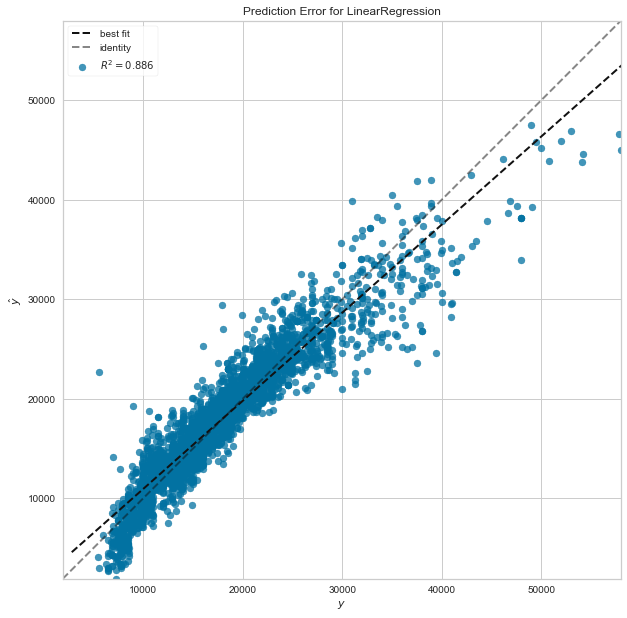

In [169]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

Koyu cizgi,datanin cizdigi 'best line'. Diger cizgi, tahminlerin en iyi oldugu noktadir. Amacimiz iki noktayi birbirine yaklastirmak. Modelin yuksek fiyatli arabalari cok iyi tahmin edemedigini goruyoruz. Yuksek fiyatli arabalar tahminlerin hepsini bozuyor, tum tahminlere zarar veriyor.

## Residual Plot

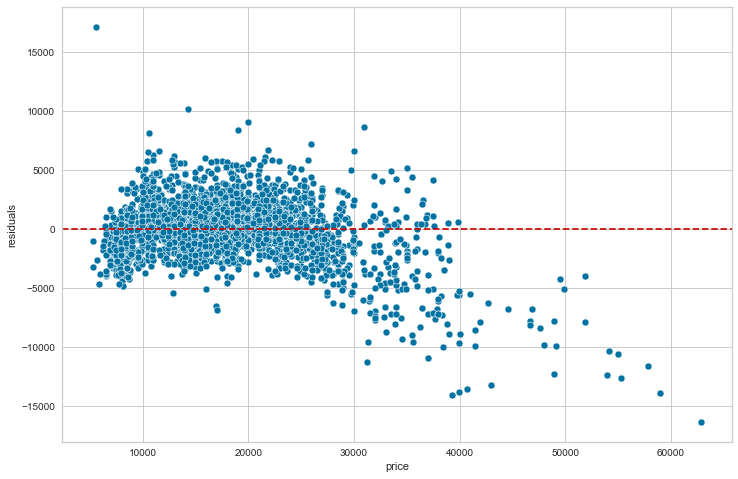

In [49]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

X ekseni : gercek fiyatlar, y ekseni : gercek fiyat - tahmin fiyati. Mesela 40.000'lik bir arac icin 15.000 fazla tahminde bulunmus. 

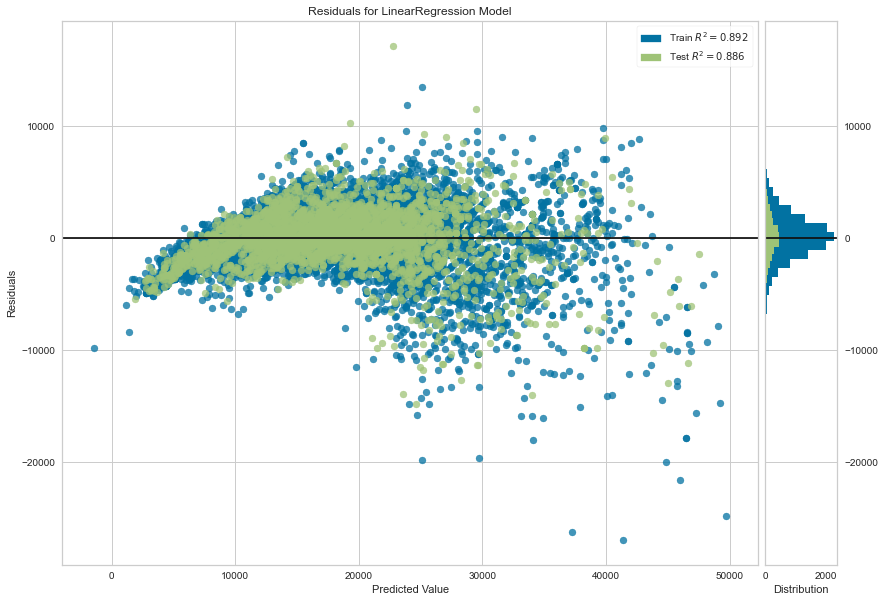

In [170]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();       

Residual cizgisinin alti ve ustunde normal dagilim olmasini bekleriz. Dusuk fiyatlilarda oyle oldugunu, yuksek fiyatlarda ise olmadigini goruyoruz.

## Dropping observations from the dataset that worsen my predictions

Modelin fiyati 35.000 uzerindeki arabalari kotu tahmin ettigini gorduk. Bu yuzden bunlari veri setinden cikarmaya karar verdik. 35.000 uzerindeki araclari veriden cikar dedik ve yeni bir df' e atadik.

In [173]:
df3 = df[~(df.Price>35000)]
df3

km  Gears  Price   Age  Previous_Owners   hp_kW  Inspection_new  \
0     56013.000  7.000  15770 3.000            2.000  66.000               1   
1     80000.000  7.000  14500 2.000            1.000 141.000               0   
2     83450.000  7.000  14640 3.000            1.000  85.000               0   
3     73000.000  6.000  14500 3.000            1.000  66.000               0   
4     16200.000  7.000  16790 3.000            1.000  66.000               1   
...         ...    ...    ...   ...              ...     ...             ...   
15786 10803.000  6.000  33990 1.000            1.000 118.000               0   
15787    15.000  7.000  33975 0.000            1.000 165.000               1   
15788     1.000  6.000  33990 1.000            1.000 118.000               0   
15789    15.000  6.000  33975 0.000            1.000 146.000               1   
15790     1.000  6.000  34200 1.000            1.000 118.000               0   

       Displacement_cc  Weight_kg  Cons_Comb  CO2_Emission  \
0             1422.000   1220.000      3.000        99.000   
1             1798.000   1255.000      5.000       129.000   
2             1598.000   1135.000      3.000        99.000   
3             1422.000   1195.000      3.000        99.000   
4             1422.000   1135.000      4.000       109.000   
...                ...        ...        ...           ...   
15786         1598.000   1734.000      4.000       123.000   
15787         1798.000   1734.000      7.000       168.000   
15788         1598.000   1734.000      4.000       120.000   
15789         1997.000   1734.000      5.000       139.000   
15790         1598.000   1734.000      4.000       123.000   

       cc_Air conditioning  cc_Air suspension  cc_Armrest  \
0                        1                  0           1   
1                        1                  0           0   
2                        1                  0           0   
3                        0                  1           1   
4                        1                  0           1   
...                    ...                ...         ...   
15786                    1                  0           1   
15787                    1                  0           1   
15788                    1                  0           0   
15789                    1                  0           0   
15790                    1                  0           0   

       cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
0                                 1                     0                  1   
1                                 1                     0                  0   
2                                 0                     0                  1   
3                                 0                     1                  0   
4                                 1                     0                  0   
...                             ...                   ...                ...   
15786                             1                     0                  1   
15787                             1                     0                  1   
15788                             1                     0                  1   
15789                             1                     0                  1   
15790                             1                     0                  1   

       cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  \
0                        0                     0                           1   
1                        0                     0                           0   
2                        0                     0                           1   
3                        0                     0                           1   
4                        0                     0                           1   
...                    ...                   ...                         ...   
15786                    0                     0     

In [175]:
len(df[df.Price>35000])    # Fiyati 35.000'den buyuk 495 arac var.

495

make_model'a gore gruplandirma yaparak fiyati yuksek olan arac ozelliklerine daha ayrintili bakmak istedik bunun icin df'in orjinal hali olan df2'yi kullandik:

In [178]:
df2[df2.Price>35000].groupby("make_model").count().iloc[:,0]    

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: km, dtype: int64

In [180]:
df2[df2.Price>35000].groupby("make_model").head()

make_model        km            Type     Fuel  Gears  \
713           Audi A1  7000.000            Used  Benzine  6.000   
732           Audi A1   200.000  Pre-registered  Benzine  7.000   
3586          Audi A3 35000.000            Used  Benzine  7.000   
3588          Audi A3     7.000             New  Benzine  7.000   
3589          Audi A3   700.000            Used  Benzine  7.000   
3590          Audi A3     7.000             New  Benzine  7.000   
3591          Audi A3  5200.000            Used  Benzine  7.000   
7624       Opel Astra     1.000             New  Benzine  6.000   
7625       Opel Astra    10.000             New  Benzine  6.000   
7627       Opel Astra    10.000             New  Benzine  6.000   
7628       Opel Astra    10.000   Demonstration  Benzine  6.000   
7629       Opel Astra     5.000             New  Benzine  6.000   
12403   Opel Insignia   999.000   Demonstration  Benzine  6.000   
12406   Opel Insignia    10.000             New   Diesel  8.000   
12407   Opel Insignia    10.000             New   Diesel  8.000   
12409   Opel Insignia    10.000             New   Diesel  8.000   
12410   Opel Insignia  7965.000   Demonstration  Benzine  6.000   
15293  Renault Espace    10.000   Demonstration   Diesel  6.000   
15294  Renault Espace  1647.363             New   Diesel  6.000   
15295  Renault Espace  2000.000   Demonstration  Benzine  6.000   
15296  Renault Espace  1647.363             New   Diesel  6.000   
15297  Renault Espace 14900.000   Demonstration  Benzine  6.000   

                                     Comfort_Convenience  \
713    Air conditioning,Seat ventilation,Split rear s...   
732    Air conditioning,Armrest,Auxiliary heating,Cru...   
3586   Air conditioning,Seat ventilation,Split rear s...   
3588   Air conditioning,Armrest,Automatic climate con...   
3589   Air conditioning,Seat ventilation,Split rear s...   
3590   Air conditioning,Armrest,Automatic climate con...   
3591   Air conditioning,Air suspension,Armrest,Automa...   
7624   Air conditioning,Armrest,Automatic climate con...   
7625   Air conditioning,Armrest,Automatic climate con...   
7627   Air conditioning,Armrest,Automatic climate con...   
7628   Air conditioning,Armrest,Automatic climate con...   
7629   Air conditioning,Armrest,Automatic climate con...   
12403  Air conditioning,Automatic climate control,Cru...   
12406  Air conditioning,Armrest,Automatic climate con...   
12407  Air conditioning,Armrest,Automatic climate con...   
12409  Air conditioning,Armrest,Automatic climate con...   
12410  Air conditioning,Armrest,Automatic climate con...   
15293  Air conditioning,Armrest,Automatic climate con...   
15294  Air conditioning,Armrest,Automatic climate con...   
15295  Air conditioning,Automatic climate control,Cru...   
15296  Air conditioning,Armrest,Automatic climate con...   
15297  Air conditioning,Automatic climate control,Cru...   

                                    Entertaintment_Media  \
713                                      Bluetooth,Radio   
732    Bluetooth,Digital radio,Hands-free equipment,O...   
3586                                               Radio   
3588                   CD player,On-board computer,Radio   
3589                                     Bluetooth,Radio   
3590                   CD player,On-board computer,Radio   
3591   Bluetooth,CD player,Digital radio,Hands-free e...   
7624   Digital radio,Hands-free equipment,On-board co...   
7625        Hands-free equipment,On-board computer,Radio   
7627        Hands-free equipment,On-board computer,Radio   
7628   Bluetooth,CD player,Hands-free equipment,On-bo...   
7629        Hands-free equipment,On-board computer,Radio   
12403                        Bluetooth,On-board computer   
12406  Bluetooth,Digital radio,Hands-free equipment,O...   
12407  Bluetooth,Digital radio,Hands-free equipment,O...   
12409  Bluetooth,Digital radio,Hands-free equipment,O...   
12410              Digital radio,On-board computer,Radio   
15293   

In [179]:
df2.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [183]:
X = df3.drop(columns = "Price")     #Yuksek fiyatlilari attiktan sonra yeni df icin yeniden train-test datalarini olusturmamiz gerekiyor.
y = df3.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [195]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

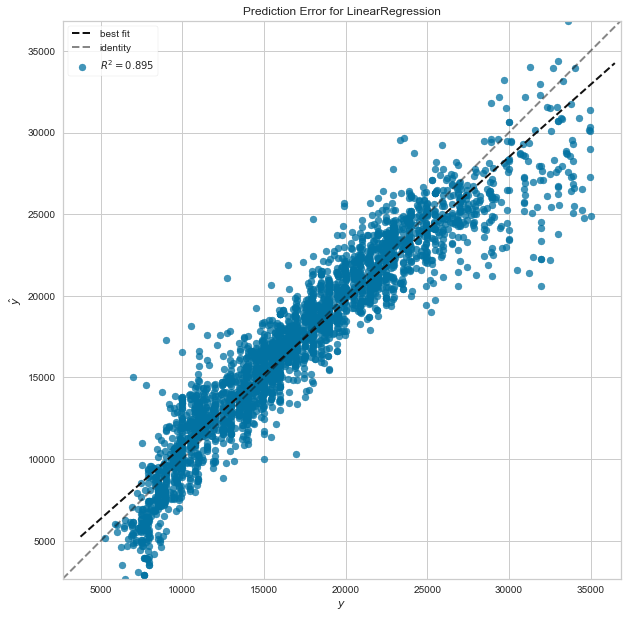

In [185]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

Yuksek fiyatli 495 araci datadan attiktan sonra sonuclarin iyilestigini, cizgilerin birbirine biraz daha yaklastigini goruyoruz. Ufak bir dokunusla modelimizi iyilestirdik.

In [191]:
train_val(lm2, X_train, y_train, X_test, y_test)

train        test
R2         0.901       0.895
mae     1405.674    1428.374
mse  3712961.758 3910065.022
rmse    1926.905    1977.388

In [198]:
1980/df3.Price.mean()  

0.11452608942623498

Modelimiz once %13 hata yapiyordu, yuksek fiyatli araclari attiktan sonra hata %11'e dustu.

In [199]:
2405/df2.Price.mean()

0.13343511633590033

In [207]:
y_pred = lm2.predict(X_test)    # Errorlar icin genel formul.

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [208]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [209]:
comp_sample = compare.sample(20)
comp_sample

Actual      Pred  Residual
12251   20750 20503.681   246.319
730     14200 13183.935  1016.065
13259   14490 14479.749    10.251
827     13980 14721.634  -741.634
8311    13470 13030.959   439.041
8161    18450 18677.723  -227.723
6416    10990 16650.375 -5660.375
4665    22820 23219.330  -399.330
6580    17850 18822.230  -972.230
5611    23490 23426.042    63.958
3351    25000 25328.955  -328.955
7900    15990 16738.481  -748.481
3805    21800 21531.178   268.822
11105   11990 14614.301 -2624.301
13973    8990  8668.460   321.540
7615    29990 24011.835  5978.165
2621    16500 16163.986   336.014
10991   13800 17034.420 -3234.420
10929   14400 14464.367   -64.367
5699    24990 24055.242   934.758

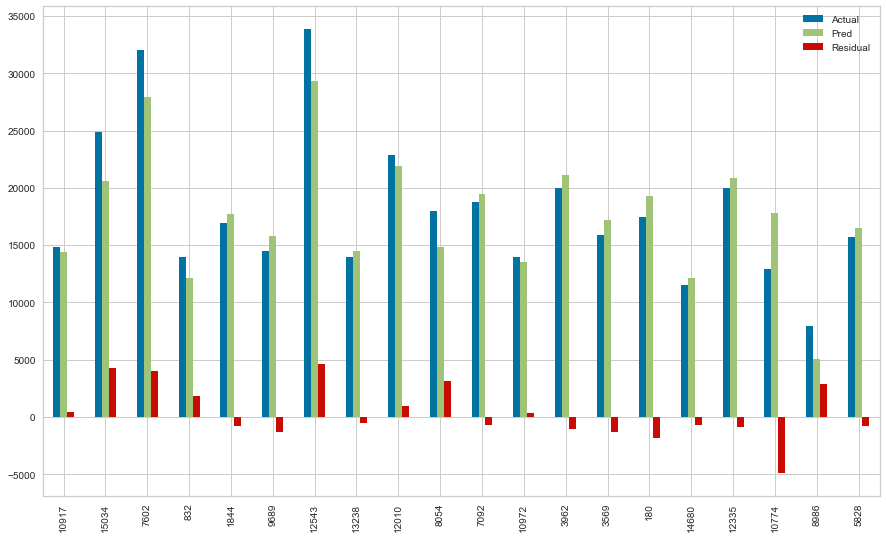

In [206]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

Yapilan hatalar genel olarak dusuk.

In [210]:
pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

Coef
make_model_Renault Duster                -10473.695
make_model_Renault Clio                   -5547.794
make_model_Opel Corsa                     -5351.386
make_model_Opel Astra                     -3506.330
Drive_Chain_rear                          -2366.887
Type_Employee's car                       -1957.497
Drive_Chain_front                         -1902.831
Type_Used                                 -1860.722
Gearing_Type_Manual                       -1610.690
Age                                       -1466.469
Fuel_Electric                             -1293.278
Type_Pre-registered                       -1272.001
make_model_Opel Insignia                  -1088.848
em_Television                              -878.023
cc_Wind deflector                          -823.516
ss_Rear airbag                             -581.416
ss_Emergency system                        -536.393
cc_Windshield                              -530.617
ss_Night view assist                       -519.616
Type_New                                   -419.622
cc_Panorama roof                           -363.850
ss_Isofix                                  -359.005
cc_Parking assist system sensors rear      -345.226
ex_Handicapped enabled                     -306.639
ss_Driver-side airbag                      -303.808
ss_Immobilizer                             -292.121
cc_Leather seats                           -291.113
em_USB                                     -273.813
ss_Electronic stability control            -237.703
ex_Right hand drive                        -236.112
em_Bluetooth                               -235.958
ss_Central door lock                       -234.790
ss_Central door lock with remote control   -234.510
cc_Lumbar support                          -229.375
ss_Xenon headlights                        -220.058
em_Sound system                            -217.776
ss_Power steering                          -201.298
cc_Electric tailgate                       -200.563
ss_LED Daytime Running Lights              -174.041
em_CD player                               -162.040
ex_Voice Control                           -146.732
ss_Daytime running lights                  -140.799
ss_Driver drowsiness detection             -137.807
cc_Rain sensor                             -118.586
cc_Split rear seats                        -114.466
ss_Tire pressure monitoring system         -102.147
ex_Ski bag                                  -95.269
ss_Fog lights                               -83.873
Body_Type_Transporter                       -70.986
ex_Touch screen                             -61.296
cc_Electrical side mirrors                  -58.533
ex_Roof rack                                -47.035
em_On-board computer                        -34.375
Inspection_new                              -34.004
ss_Alarm system                             -33.505
cc_Electrically adjustable seats            -28.718
cc_Armrest                                  -27.116
cc_Auxiliary heating                        -13.051
CO2_Emission                                 -6.176
Displacement_cc                              -1.367
Weight_kg                                    -0.969
km                                           -0.034
cc_Electric Starter                          -0.000
cc_Power windows                              8.625
ss_Head airbag                               18.197
ss_Traffic sign recognition                  22.045
cc_Electrically heated windshield            28.337
cc_Hill Holder                               35.089
em_Hands-free equipment                      39.453
Cons_Comb                                    47.386
cc_Light sensor                              52.205
Body_Type_Coupe                              61.418
cc_Start-stop system                         67.742
hp_kW                                        70.529
cc_Seat heating                              71.164
em_Radio                                     79.101
ex_Winter tyres                            

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [211]:
scaler = MinMaxScaler()       # Dummies feature' lar icin MinMaxScaler kullanilir.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge

In [212]:
from sklearn.linear_model import Ridge, RidgeCV

In [213]:
ridge_model = Ridge(random_state=42)

In [214]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [215]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.901       0.895
mae     1405.655    1427.283
mse  3714641.162 3900640.826
rmse    1927.340    1975.004

## Finding best alpha for Ridge

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [218]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [219]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [220]:
#ridge_grid_model.best_estimator_

In [221]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [222]:
pd.DataFrame(ridge_grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           1.046         0.505            0.002           0.002       0.010   
1           0.035         0.013            0.001           0.000       1.020   
2           0.035         0.006            0.001           0.001       2.030   
3           0.033         0.005            0.001           0.001       3.040   
4           0.031         0.005            0.000           0.000       4.050   
5           0.033         0.005            0.001           0.000       5.060   
6           0.034         0.004            0.000           0.000       6.070   
7           0.031         0.005            0.000           0.000       7.080   
8           0.030         0.004            0.001           0.000       8.090   
9           0.032         0.003            0.001           0.000       9.100   
10          0.033         0.005            0.001           0.000      10.110   
11          0.033         0.003            0.001           0.000      11.120   
12          0.031         0.003            0.001           0.000      12.130   
13          0.033         0.003            0.001           0.000      13.140   
14          0.032         0.005            0.001           0.000      14.150   
15          0.033         0.004            0.000           0.000      15.160   
16          0.033         0.006            0.001           0.000      16.170   
17          0.033         0.007            0.001           0.000      17.180   
18          0.034         0.004            0.001           0.000      18.190   
19          0.031         0.004            0.001           0.000      19.200   
20          0.035         0.005            0.001           0.000      20.210   
21          0.039         0.013            0.001           0.001      21.220   
22          0.039         0.010            0.001           0.001      22.230   
23          0.039         0.007            0.001           0.000      23.240   
24          0.030         0.007            0.001           0.000      24.250   
25          0.034         0.006            0.000           0.000      25.260   
26          0.037         0.020            0.001           0.001      26.270   
27          0.033         0.007            0.001           0.000      27.280   
28          0.036         0.007            0.001           0.000      28.290   
29          0.035         0.009            0.001           0.001      29.300   
30          0.034         0.007            0.001           0.000      30.310   
31          0.035         0.009            0.000           0.000      31.320   
32          0.035         0.006            0.001           0.000      32.330   
33          0.028         0.007            0.001           0.000      33.340   
34          0.036         0.014            0.001           0.000      34.350   
35          0.031         0.007            0.001           0.000      35.360   
36          0.034         0.010            0.001           0.000      36.370   
37          0.032         0.004            0.001           0.001      37.380   
38          0.036         0.006            0.001           0.001      38.390   
39          0.033         0.004            0.001           0.000      39.400   
40          0.032         0.006            0.001           0.000      40.410   
41          0.031         0.006            0.001           0.000      41.420   
42          0.037         0.007            0.001           0.000      42.430   
43          0.039         0.011            0.001           0.001      43.440   
44          0.031         0.006            0.001           0.001      44.450   
45          0.035         0.008            0.001           0.000      45.460   
46          0.040         0.009            0.001           0.000      46.470   
47          0.037         0.008            0.001           0.000      47.480   
48          0.034         0.006            0.001           0.000      48.490   
49  

In [223]:
ridge_grid_model.best_index_   # En iyi skor 1. indexte.

1

In [226]:
ridge_grid_model.best_score_

-1953.0821952801502

In [227]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.901       0.895
mae     1405.657    1427.267
mse  3714699.448 3900528.154
rmse    1927.356    1974.975

In [228]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [229]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

Coef
km                                       -10610.045
make_model_Renault Duster                 -9118.941
make_model_Renault Clio                   -5513.671
make_model_Opel Corsa                     -5343.063
Age                                       -4435.196
make_model_Opel Astra                     -3468.186
Type_Employee's car                       -1940.268
Type_Used                                 -1850.993
Drive_Chain_front                         -1787.223
Drive_Chain_rear                          -1678.481
Gearing_Type_Manual                       -1623.155
Weight_kg                                 -1475.120
Displacement_cc                           -1458.070
Type_Pre-registered                       -1252.812
make_model_Opel Insignia                  -1048.364
CO2_Emission                               -825.070
cc_Wind deflector                          -813.286
em_Television                              -747.527
Fuel_Electric                              -645.951
ss_Rear airbag                             -585.554
ss_Emergency system                        -533.437
ss_Night view assist                       -527.201
cc_Windshield                              -477.388
Type_New                                   -402.486
cc_Panorama roof                           -358.708
ss_Isofix                                  -354.599
cc_Parking assist system sensors rear      -349.520
ex_Handicapped enabled                     -327.459
ss_Driver-side airbag                      -322.683
cc_Leather seats                           -293.348
ss_Immobilizer                             -291.121
em_USB                                     -277.232
em_Bluetooth                               -238.916
ss_Electronic stability control            -232.043
cc_Lumbar support                          -229.230
ss_Central door lock                       -228.977
ss_Central door lock with remote control   -228.146
ex_Right hand drive                        -215.535
em_Sound system                            -215.173
ss_Xenon headlights                        -213.657
ss_Power steering                          -206.895
cc_Electric tailgate                       -195.711
ss_LED Daytime Running Lights              -176.380
em_CD player                               -166.733
ex_Voice Control                           -145.270
ss_Daytime running lights                  -142.862
ss_Driver drowsiness detection             -134.833
Body_Type_Transporter                      -122.663
cc_Rain sensor                             -115.567
cc_Split rear seats                        -113.630
ss_Tire pressure monitoring system         -106.670
ss_Fog lights                               -87.174
ex_Ski bag                                  -84.533
ex_Touch screen                             -61.754
cc_Electrical side mirrors                  -57.885
ex_Roof rack                                -53.754
em_On-board computer                        -39.718
Inspection_new                              -35.959
cc_Electrically adjustable seats            -34.998
ss_Alarm system                             -33.267
cc_Armrest                                  -23.608
cc_Auxiliary heating                        -20.146
cc_Electric Starter                           0.000
ss_Head airbag                               13.196
ss_Traffic sign recognition                  17.907
cc_Power windows                             18.762
cc_Electrically heated windshield            24.829
cc_Hill Holder                               31.762
em_Hands-free equipment                      42.363
cc_Light sensor                              55.233
Body_Type_Coupe                              66.690
cc_Start-stop system                         73.891
em_Radio                                     77.461
cc_Seat heating                              79.272
ex_Winter tyres                              95.110
ss_Blind spot monitor                       107.327
em_MP3                                     

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [230]:
from sklearn.linear_model import Lasso, LassoCV

In [231]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [232]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.901       0.895
mae     1406.624    1424.007
mse  3728475.309 3889630.785
rmse    1930.926    1972.215

## Finding best alpha for Lasso

In [237]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [238]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [239]:
lasso_grid_model.best_params_

{'alpha': 0.01}

In [240]:
lasso_grid_model.best_score_

-1953.2418482386208

In [241]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.901       0.895
mae     1405.673    1428.231
mse  3712966.758 3909345.029
rmse    1926.906    1977.206

In [244]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [245]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

Coef
km                                       -10625.170
make_model_Renault Duster                 -8157.593
make_model_Renault Clio                   -5485.831
make_model_Opel Corsa                     -5370.384
Age                                       -4432.088
make_model_Opel Astra                     -3473.421
Type_Employee's car                       -1819.794
Type_Used                                 -1757.803
Gearing_Type_Manual                       -1633.272
Drive_Chain_front                         -1579.205
Displacement_cc                           -1327.252
Type_Pre-registered                       -1140.420
Weight_kg                                 -1092.146
make_model_Opel Insignia                  -1080.872
ss_Rear airbag                             -571.463
ss_Emergency system                        -547.538
CO2_Emission                               -455.903
cc_Wind deflector                          -450.108
ss_Isofix                                  -338.256
ss_Night view assist                       -327.475
cc_Parking assist system sensors rear      -321.261
Type_New                                   -311.140
ss_Driver-side airbag                      -288.598
ss_Immobilizer                             -280.303
cc_Panorama roof                           -270.788
em_USB                                     -270.773
em_Bluetooth                               -222.901
cc_Lumbar support                          -222.422
ss_Electronic stability control            -220.537
ss_Central door lock                       -207.746
ss_Central door lock with remote control   -206.771
em_Sound system                            -199.348
ss_Xenon headlights                        -190.724
ss_Power steering                          -183.791
em_Television                              -181.475
ss_LED Daytime Running Lights              -170.193
cc_Electric tailgate                       -162.103
em_CD player                               -155.995
ss_Daytime running lights                  -138.225
ex_Voice Control                           -135.689
ss_Tire pressure monitoring system         -110.372
cc_Rain sensor                              -93.719
cc_Split rear seats                         -88.971
ss_Fog lights                               -85.039
ss_Driver drowsiness detection              -80.489
ex_Handicapped enabled                      -69.995
ex_Touch screen                             -65.301
cc_Electrical side mirrors                  -36.953
ex_Ski bag                                  -32.829
Inspection_new                              -32.560
em_On-board computer                        -32.525
ss_Alarm system                             -31.156
ex_Roof rack                                -18.280
cc_Electrically adjustable seats            -17.610
cc_Armrest                                  -14.931
Body_Type_Coupe                               0.000
ex_Winter tyres                               0.000
ss_Head airbag                                0.000
ex_Tuned car                                  0.000
Body_Type_Transporter                        -0.000
ex_Right hand drive                          -0.000
Fuel_Electric                                -0.000
ex_Sliding door                               0.000
Drive_Chain_rear                             -0.000
Cons_Comb                                     0.000
cc_Auxiliary heating                          0.000
cc_Electric Starter                           0.000
cc_Electrically heated windshield             0.000
cc_Leather seats                             -0.000
cc_Power windows                              0.000
cc_Windshield                                -0.000
ss_Traffic sign recognition                   9.187
em_Hands-free equipment                      21.492
cc_Hill Holder                               33.366
cc_Light sensor                              41.533
cc_Start-stop system                         66.385
ex_Cab or rented Car                       

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [246]:
from sklearn.linear_model import ElasticNet

In [247]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [248]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.599        0.599
mae      3081.066     3038.281
mse  15133890.180 14900611.156
rmse     3890.230     3860.131

ElastikNet' te skorlar cok kotu.

## Finding best alpha and l1_ratio for ElasticNet

In [250]:
elastic_model = ElasticNet(random_state=42)

In [251]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [252]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [253]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [254]:
elastic_grid_model.best_score_

-1953.8264153711796

In [255]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.901       0.895
mae     1406.674    1423.976
mse  3728985.799 3889565.111
rmse    1931.058    1972.198

In [256]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

Lasso'nun en iyi alpha=0.01 degerini kullanarak grafigimize bakacagiz. Lasso'yu seciyoruz cunku featrue selection yaparken Ridge kullanilmaz.

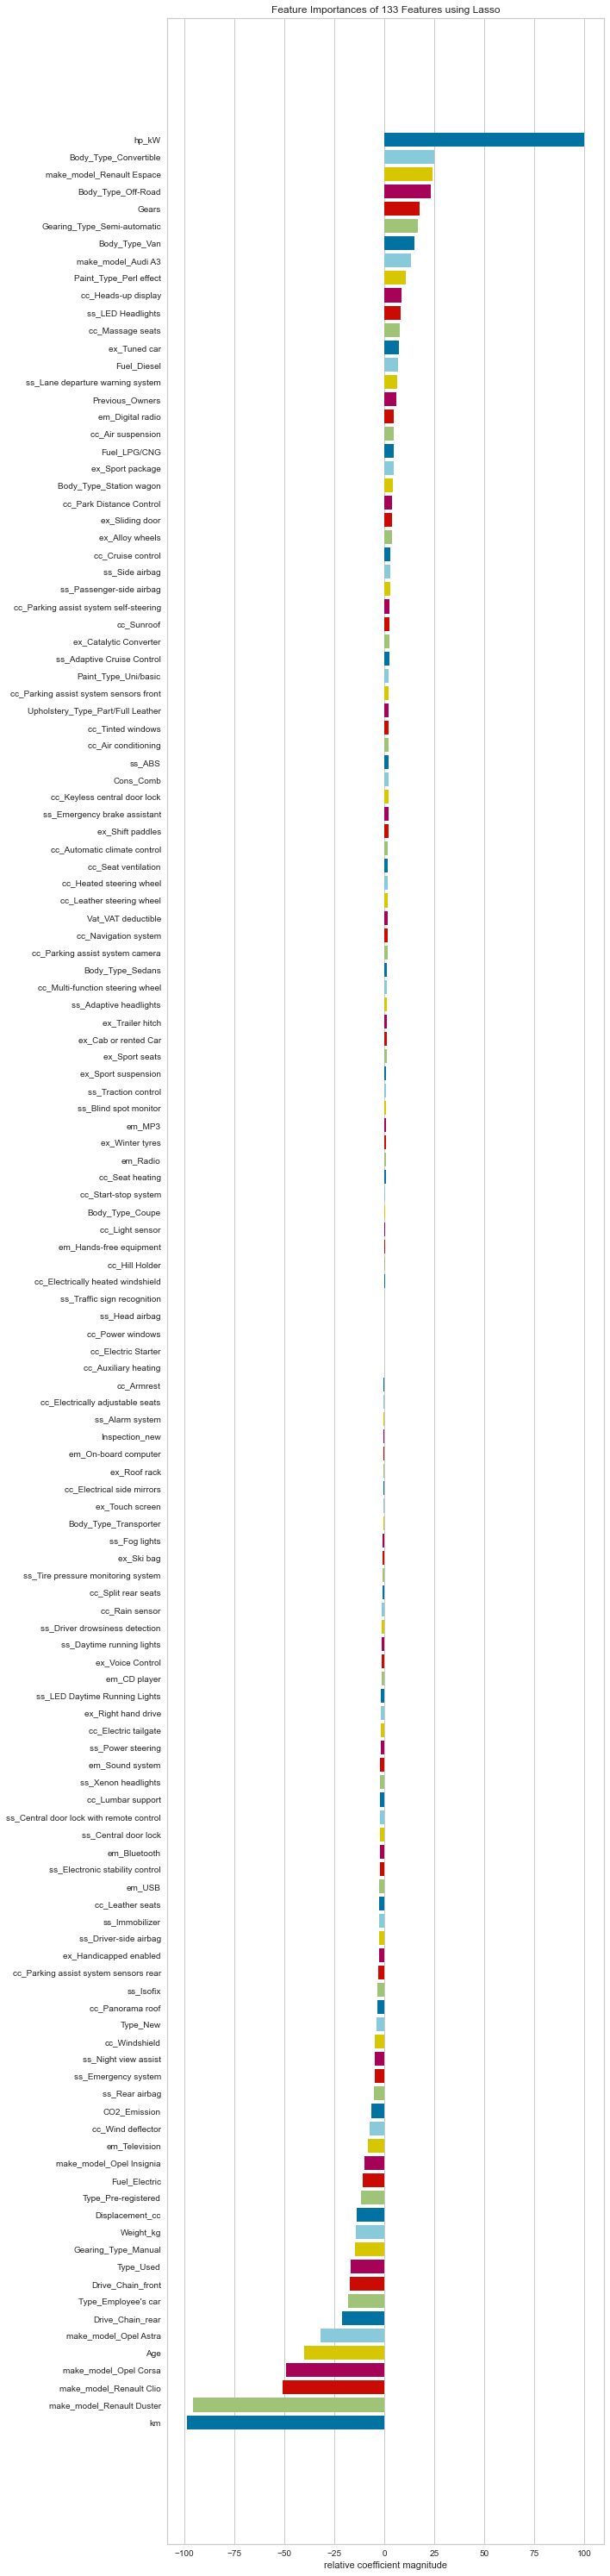

In [259]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz


viz = FeatureImportances(Lasso(alpha=0.01), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

hp_kW, Make_Model, Gears, km, age sutunlarinin tahminlerde cok etkili oldugunu goruyoruz. En onemli 5 feature' i sectik.

In [266]:
df_new = df2[["make_model", "hp_kW", "km","Age", "Gearing_Type", 'Price']]    

#df'in dummies edilmemis hali olan df2'den sectigimiz onemli featura'lari aldik ve yeni bir df'e atadik.

In [267]:
df_new

make_model   hp_kW        km   Age Gearing_Type  Price
0             Audi A1  66.000 56013.000 3.000    Automatic  15770
1             Audi A1 141.000 80000.000 2.000    Automatic  14500
2             Audi A1  85.000 83450.000 3.000    Automatic  14640
3             Audi A1  66.000 73000.000 3.000    Automatic  14500
4             Audi A1  66.000 16200.000 3.000    Automatic  16790
...               ...     ...       ...   ...          ...    ...
15909  Renault Espace 147.000  1647.363 0.000    Automatic  39950
15910  Renault Espace 165.000  9900.000 0.000    Automatic  39885
15911  Renault Espace 146.000    15.000 0.000    Automatic  39875
15912  Renault Espace 147.000    10.000 0.000    Automatic  39700
15913  Renault Espace 165.000  1647.363 0.000    Automatic  40999

[15914 rows x 6 columns]

In [268]:
df_new.head()

make_model   hp_kW        km   Age Gearing_Type  Price
0    Audi A1  66.000 56013.000 3.000    Automatic  15770
1    Audi A1 141.000 80000.000 2.000    Automatic  14500
2    Audi A1  85.000 83450.000 3.000    Automatic  14640
3    Audi A1  66.000 73000.000 3.000    Automatic  14500
4    Audi A1  66.000 16200.000 3.000    Automatic  16790

In [269]:
df_new[df_new["make_model"] == "Audi A2"]

Empty DataFrame
Columns: [make_model, hp_kW, km, Age, Gearing_Type, Price]
Index: []

In [270]:
df_new.drop(index=[2614], inplace =True)

In [272]:
df_new = df_new[~(df_new.Price>35000)]

Onceki uyguladigimiz islemleri bu df'e de uygulayarak Audi A2'yi ve Price>35000 olan araclari dusuruyoruz. Sonrasinda get_dummies uyguluyoruz fakat drop first kullanmiyoruz. Cunku zaten feature selection yapacagiz.

In [273]:
df_new = pd.get_dummies(df_new)
df_new

hp_kW        km   Age  Price  make_model_Audi A1  make_model_Audi A3  \
0      66.000 56013.000 3.000  15770                   1                   0   
1     141.000 80000.000 2.000  14500                   1                   0   
2      85.000 83450.000 3.000  14640                   1                   0   
3      66.000 73000.000 3.000  14500                   1                   0   
4      66.000 16200.000 3.000  16790                   1                   0   
...       ...       ...   ...    ...                 ...                 ...   
15786 118.000 10803.000 1.000  33990                   0                   0   
15787 165.000    15.000 0.000  33975                   0                   0   
15788 118.000     1.000 1.000  33990                   0                   0   
15789 146.000    15.000 0.000  33975                   0                   0   
15790 118.000     1.000 1.000  34200                   0                   0   

       make_model_Opel Astra  make_model_Opel Corsa  make_model_Opel Insignia  \
0                          0                      0                         0   
1                          0                      0                         0   
2                          0                      0                         0   
3                          0                      0                         0   
4                          0                      0                         0   
...                      ...                    ...                       ...   
15786                      0                      0                         0   
15787                      0                      0                         0   
15788                      0                      0                         0   
15789                      0                      0                         0   
15790                      0                      0                         0   

       make_model_Renault Clio  make_model_Renault Duster  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
15786                        0                          0   
15787                        0                          0   
15788                        0                          0   
15789                        0                          0   
15790                        0                          0   

       make_model_Renault Espace  Gearing_Type_Automatic  Gearing_Type_Manual  \
0                              0                       1                    0   
1                              0                       1                    0   
2                              0                       1                    0   
3                              0                       1                    0   
4                              0                       1                    0   
...                          ...                     ...                  ...   
15786                          1                       1                    0   
15787                          1                       1                    0   
15788                          1                       1                    0   
15789                          1                       1                    0   
15790                          1                       1                    0   

       Gearing_Type_Semi-automatic  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
15786                            0  
15787                            0  
15788                            0 

In [274]:
len(df_new)

15418

In [277]:
X = df_new.drop(columns = ["Price"])
y= df_new.Price

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [279]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [280]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [281]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [282]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [283]:
lasso_final_model.best_score_

-2211.549364976695

In [284]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.870       0.866
mae     1592.248    1605.601
mse  4886743.852 4966654.297
rmse    2210.598    2228.599

In [286]:
2230/df_new.Price.mean()

0.1289864542527798

Olusturdugumuz yeni df_new' de sectigimiz 6 sutun ile modelimi %12 hata yapiyor. Fazla feature ile olusturulan model su anki model kiyaslanarak en mantikli yol secilmeli, musteri bilgilendirilmeli.

In [288]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

Butun skorlari tek bir kodla birlestirip kiyaslayalim :

In [289]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

r2_score      mae     rmse
linear_m      0.895 1428.374 1977.388
ridge_m       0.895 1427.267 1974.975
lasso_m       0.895 1428.231 1977.206
elastic_m     0.895 1423.976 1972.198
final_m       0.866 1605.601 2228.599

In [291]:
for i in scores:
    print(i)

r2_score
mae
rmse


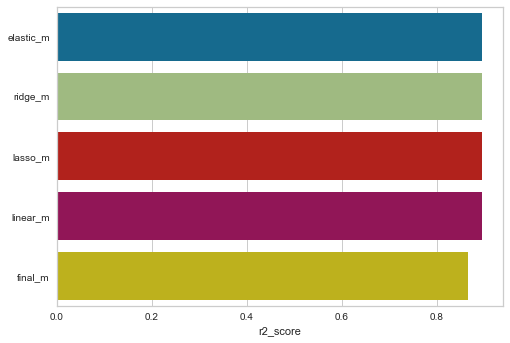

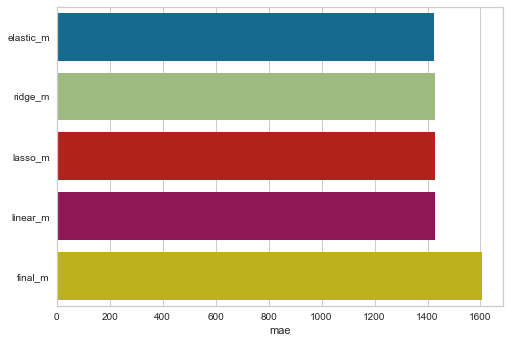

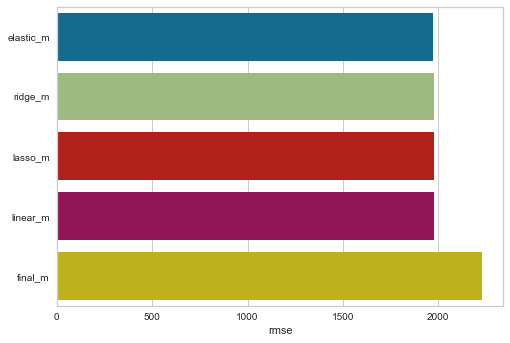

In [297]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False             # R2 skoru buyukten kucuge sirala.
    else:
        ascending = True              # mae ve rmse' yi kucukten buyuge sirala.
    compare = scores.sort_values(by=j, ascending=ascending)
    sns.barplot(x = compare[j], y = compare.index)
   

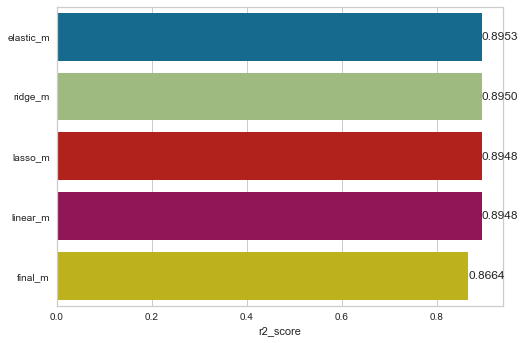

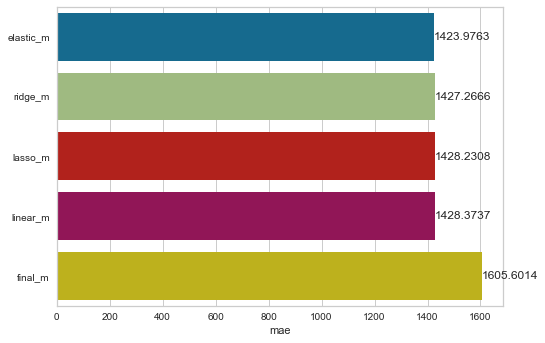

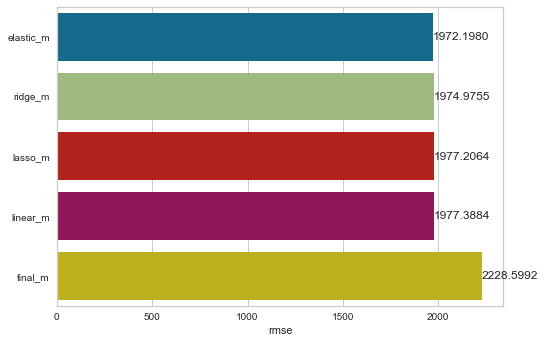

In [296]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False             
    else:
        ascending = True              
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j], y = compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

Modelleri kiyasladik. Linear model her zaman dengesizlige acik oldugu icin diger 3 modelden birini tercih etmek mantikli olur. Amacimiz min feature ile max skoru elde etmek olmali. Bulunan modeller musterı ıle paylasılır.

## Prediction new observation

Artık scale ıslemını butun dataya uyguluyoruz :

In [303]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [309]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=lasso_model,              #GridSearchCV ile tum data icin en iyi alpha degerini buluyoruz.
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [310]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [311]:
final_model.best_estimator_      

Lasso(alpha=0.01, random_state=42)

Yukarıda model egitimini tamamladıktan sonra asagıda verilen feature'lar ile modelin gücünü ölçmek için tahmin yapmaya çalışalım :

In [316]:
my_dict = {                          # Bilgileri dict icine aldık ki sonra DataFrame'e çevirebilelim.
    "hp_kW": 66,
    "age": 2,                        # Eğitim hangi DataFrame yapısı ile gerçekleştirildiyse prediction da aynı DataFrame yapısıyla olmalı.
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [317]:
my_dict = pd.DataFrame([my_dict])       
my_dict

hp_kW  age     km make_model Gearing_Type
0     66    2  17000    Audi A3    Automatic

my_dict'i DataFrame'e dönüştürdük ama bize verilen tahmin değerleri get_dummies yapılmamış halde. Halbuki datamızdakilere get_dummies uygulanmıştı.

In [318]:
X.head(1)

hp_kW        km   Age  make_model_Audi A1  make_model_Audi A3  \
0 66.000 56013.000 3.000                   1                   0   

   make_model_Opel Astra  make_model_Opel Corsa  make_model_Opel Insignia  \
0                      0                      0                         0   

   make_model_Renault Clio  make_model_Renault Duster  \
0                        0                          0   

   make_model_Renault Espace  Gearing_Type_Automatic  Gearing_Type_Manual  \
0                          0                       1                    0   

   Gearing_Type_Semi-automatic  
0                            0

In [319]:
my_dict = pd.get_dummies(my_dict)
my_dict

hp_kW  age     km  make_model_Audi A3  Gearing_Type_Automatic
0     66    2  17000                   1                       1

reindex -------> X' in columnslarına göre X ile aynı sayıda yeni columnslar oluştur, my_dict ile kesişen feature bilgilerin aynen kalsın, geri kalan columnsları 0 ile doldur.

In [322]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)
my_dict

hp_kW     km  Age  make_model_Audi A1  make_model_Audi A3  \
0     66  17000    0                   0                   1   

   make_model_Opel Astra  make_model_Opel Corsa  make_model_Opel Insignia  \
0                      0                      0                         0   

   make_model_Renault Clio  make_model_Renault Duster  \
0                        0                          0   

   make_model_Renault Espace  Gearing_Type_Automatic  Gearing_Type_Manual  \
0                          0                       1                    0   

   Gearing_Type_Semi-automatic  
0                            0

In [326]:
X.head(1)

hp_kW        km   Age  make_model_Audi A1  make_model_Audi A3  \
0 66.000 56013.000 3.000                   1                   0   

   make_model_Opel Astra  make_model_Opel Corsa  make_model_Opel Insignia  \
0                      0                      0                         0   

   make_model_Renault Clio  make_model_Renault Duster  \
0                        0                          0   

   make_model_Renault Espace  Gearing_Type_Automatic  Gearing_Type_Manual  \
0                          0                       1                    0   

   Gearing_Type_Semi-automatic  
0                            0

Tahmin ile model yapısı birbirine uygun hale geldi ama modelimiz scale edilmişti. Tahminimiz ise scale edilmiş değil, tamin değerlerine de scale işlemi uygulamamız gerekiyor.

Eğitim scale'lenmiş data ile yapıldıysa, prediction da scale'lenmiş data ile olmalı.

In [333]:
my_dict = final_scaler.transform(my_dict)    # Yukarıda bütün datayı fit etmiştik. Prediction'a fit işlemi uygulanmaz, sadece transform uygulanır.
my_dict                                      # Prediction değerleri, orjinal datamızdaki min-max bilgilerine göre scale edilmiş oldu.

array([[-2.02020202e-01,  5.31071029e-24,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [335]:
final_model.predict(my_dict)       # Oluşturduğumuz modele göre, tahmin için verilen arabanın fiyatı yaklaşık olarak 18788 euro imiş.

array([18788.14884035])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___